In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
# Generar datos sintéticos
np.random.seed(25)
n_samples = 1000

data = {
    'glucose': np.random.normal(120, 30, n_samples).clip(70, 200),
    'blood_pressure': np.random.normal(70, 10, n_samples).clip(40, 100),
    'insulin': np.random.normal(80, 40, n_samples).clip(10, 300),
    'bmi': np.random.normal(30, 5, n_samples).clip(15, 50),
    'age': np.random.randint(18, 80, n_samples),
}

In [20]:
# Crear variable objetivo (diabetes) con cierta lógica artificial
data['diabetes'] = np.where(
    (data['glucose'] > 140) | ((data['bmi'] > 35) & (data['age'] > 45)),
    1, 0
)

In [21]:
df = pd.DataFrame(data)

In [22]:
df.head()

,glucose,blood_pressure,insulin,bmi,age,diabetes
0,126.848193,66.100185,10.000000,36.429726,77,1
1,150.806709,62.475586,108.872935,27.221873,38,1
2,94.812455,62.651289,57.637307,22.759345,20,0
3,102.264554,100.000000,30.590281,34.130853,69,0
4,91.293351,58.264414,96.828630,23.429702,22,0


In [23]:
# Definir características y objetivo
features = ['glucose', 'blood_pressure', 'insulin', 'bmi', 'age']
target = 'diabetes'

In [24]:
label_encoders = {}
for column in ['glucose', 'blood_pressure', 'bmi']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [25]:
x = df[features]
y = df[target]

# División de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Modelo Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [27]:
# Modelo Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [28]:
y_pred = model.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 88.00%


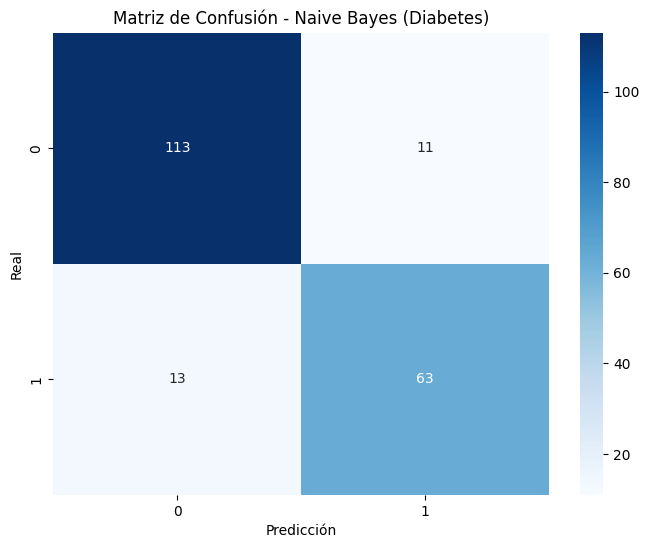

In [30]:
# Visualización de matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de Confusión - Naive Bayes (Diabetes)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [31]:
def calcular_matriz_transicion(column):
    estados = df[column].unique()
    n = len(estados)
    matriz_transicion = np.zeros((n, n))

    estado_indices = {estado: i for i, estado in enumerate(estados)}

    for i in range(len(df) - 1):
        estado_actual = df[column].iloc[i]
        estado_siguiente = df[column].iloc[i + 1]
        matriz_transicion[estado_indices[estado_actual], estado_indices[estado_siguiente]] += 1

    matriz_transicion = matriz_transicion / matriz_transicion.sum(axis=1, keepdims=True)
    return matriz_transicion, estados

In [32]:
# Visualización de matriz de transición
def visualizar_matriz_transicion(matriz, estados, column):
    plt.figure(figsize=(8,6))
    sns.heatmap(matriz, xticklabels=estados, yticklabels=estados, annot=True, cmap='Blues')
    plt.title(f'Matriz de Transición - {column}')
    plt.xlabel('Estado Siguiente')
    plt.ylabel('Estado Actual')
    plt.show()

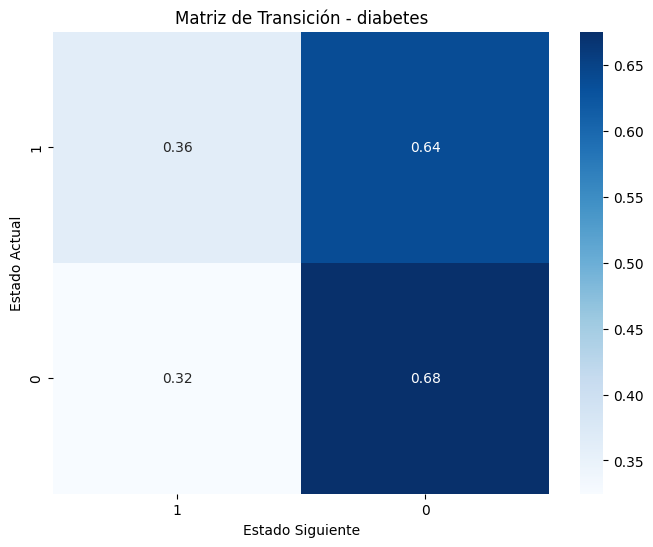

In [33]:
# Calcular y mostrar la matriz de transición para 'diabetes'
matriz_diabetes, estados_diabetes = calcular_matriz_transicion('diabetes')
visualizar_matriz_transicion(matriz_diabetes, estados_diabetes, 'diabetes')

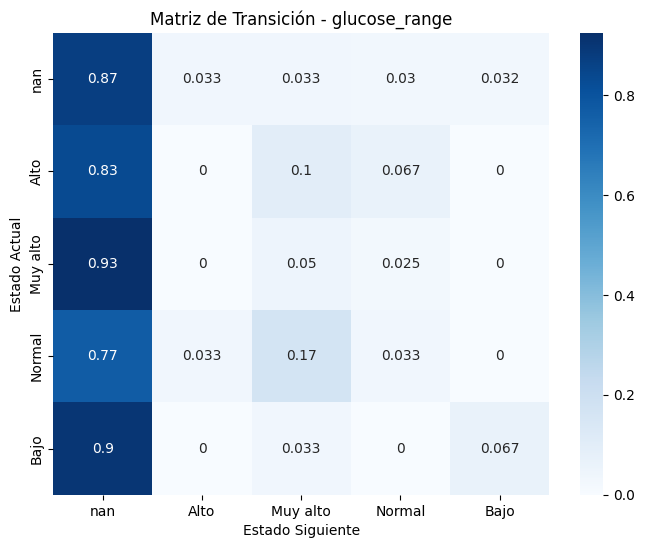

In [34]:
# Binning de glucosa para agrupar en rangos
df['glucose_range'] = pd.cut(df['glucose'], bins=[70, 100, 130, 160, 200], labels=['Bajo', 'Normal', 'Alto', 'Muy alto'])

# Luego usar esta nueva columna:
matriz_glucosa, estados_glucosa = calcular_matriz_transicion('glucose_range')
visualizar_matriz_transicion(matriz_glucosa, estados_glucosa, 'glucose_range')
